In [1]:
# Imp libs:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing and Normalizing data:
from sklearn.preprocessing import StandardScaler

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV

# Model instantiating
from sklearn.ensemble import RandomForestClassifier

# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
training_dataset = 'https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv'
df = pd.read_csv(training_dataset)
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
"""
EDA:

Dataset statistics

Number of variables:43
Number of observations:571
Missing cells:425
Missing cells (%):1.7%
Duplicate rows:0
Duplicate rows (%):0.0%
Total size in memory:191.9 KiB
Average record size in memory:344.2 B

We have additionally generated Profil Report function to get sumary of whole dataset that is included in notebook below.

1. There are 571 rows and 43 columns in the students grades dataset.

2. Some null values can be seen on dataset. We will remove null values and now we are left with
   417 non null rows.
   
3. Except CGPA column whivh is float64, all values are object type.

4. Descriptive statistics column shows that, values range from 1.70 to 3.98 which is max cgpa that a student has got.
Standard deviation is 0.57. Rest, data looks fine.

5. By checking data distribution of CGPA column , it is slightly skewed but it can be considered.

6.  We will now check relationship between categorical features and label using stripplot.

    Seat numbers and CGPA , data points are randomly scattered and are not telling much about CGPA value.

    Students who scored A+ grade scored exceptionaly good CGPA.

    For CY-105 CS-105 and mostly all the columns students with grade A scored max CGPA , 

    Students who scored grades C,C+,D got very poor CGPA.

    Students who scored grades B+,B and C+ got average CGPA.

    By HS-101 , some students who scored grade B+,A- grade got very less CGPA and very good CGPA as well.

7. Skewness in CGPA i.e.-0.326574 , is under limits.

8.  We have used several models to check and compare accuracy but the best accuracy we have got with RidgeCV algorithm and 
    Best alpha rate is 0.01, results are shared below:

    MAE:  0.05392980299149519
    MSE:  0.004809186073103784
    RMSE:  0.0693482953871527
    R2:  0.984947251704131 
    Score:  0.9934250206728078


"""

'\nEDA:\n\nDataset statistics\n\nNumber of variables:43\nNumber of observations:571\nMissing cells:425\nMissing cells (%):1.7%\nDuplicate rows:0\nDuplicate rows (%):0.0%\nTotal size in memory:191.9 KiB\nAverage record size in memory:344.2 B\n\nWe have additionally generated Profil Report function to get sumary of whole dataset that is included in notebook below.\n\n1. There are 571 rows and 43 columns in the students grades dataset.\n\n2. Some null values can be seen on dataset. We will remove null values and now we are left with\n   417 non null rows.\n   \n3. Except CGPA column whivh is float64, all values are object type.\n\n4. Descriptive statistics column shows that, values range from 1.70 to 3.98 which is max cgpa that a student has got.\nStandard deviation is 0.57. Rest, data looks fine.\n\n5. By checking data distribution of CGPA column , it is slightly skewed but it can be considered.\n\n6.  We will now check relationship between categorical features and label using stripplot.

In [5]:
df.shape

(571, 43)

In [6]:
nulls = df.isnull().sum()
nulls

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.shape

(417, 43)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   417 non-null    object 
 1   PH-121     417 non-null    object 
 2   HS-101     417 non-null    object 
 3   CY-105     417 non-null    object 
 4   HS-105/12  417 non-null    object 
 5   MT-111     417 non-null    object 
 6   CS-105     417 non-null    object 
 7   CS-106     417 non-null    object 
 8   EL-102     417 non-null    object 
 9   EE-119     417 non-null    object 
 10  ME-107     417 non-null    object 
 11  CS-107     417 non-null    object 
 12  HS-205/20  417 non-null    object 
 13  MT-222     417 non-null    object 
 14  EE-222     417 non-null    object 
 15  MT-224     417 non-null    object 
 16  CS-210     417 non-null    object 
 17  CS-211     417 non-null    object 
 18  CS-203     417 non-null    object 
 19  CS-214     417 non-null    object 
 20  EE-217    

In [10]:
df.describe()

,CGPA
count,417.000000
mean,2.990386
std,0.578246
min,1.708000
25%,2.603000
50%,3.033000
75%,3.452000
max,3.985000


In [11]:
grds = []
for i in df.CGPA:
    if i < 2:
        grds.append('C')
    elif i in range(2,3):
        grds.append('B')
    else:
        grds.append('A')
        
df['Grades'] = grds

In [12]:
# Lets check for duplicated values:

print(df[df.duplicated(keep=False)])

# drop duplicated values
df.drop_duplicates(inplace=True)

Empty DataFrame
Columns: [Seat No., PH-121, HS-101, CY-105, HS-105/12, MT-111, CS-105, CS-106, EL-102, EE-119, ME-107, CS-107, HS-205/20, MT-222, EE-222, MT-224, CS-210, CS-211, CS-203, CS-214, EE-217, CS-212, CS-215, MT-331, EF-303, HS-304, CS-301, CS-302, TC-383, MT-442, EL-332, CS-318, CS-306, CS-312, CS-317, CS-403, CS-421, CS-406, CS-414, CS-419, CS-423, CS-412, CGPA, Grades]
Index: []

[0 rows x 44 columns]


In [13]:
df.shape

(417, 44)

In [14]:
# Differentiating continuous and categorical data:

cont_data = df.select_dtypes(include=['int64','float64'])

cat_data= df.select_dtypes(include=['object'])

cont_columns = cont_data.columns

cat_columns = cat_data.columns

print('Numerical columns: ', cont_columns)

print('Categorical columns: ', cat_columns)

Numerical columns:  Index(['CGPA'], dtype='object')
Categorical columns:  Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'Grades'],
      dtype='object')


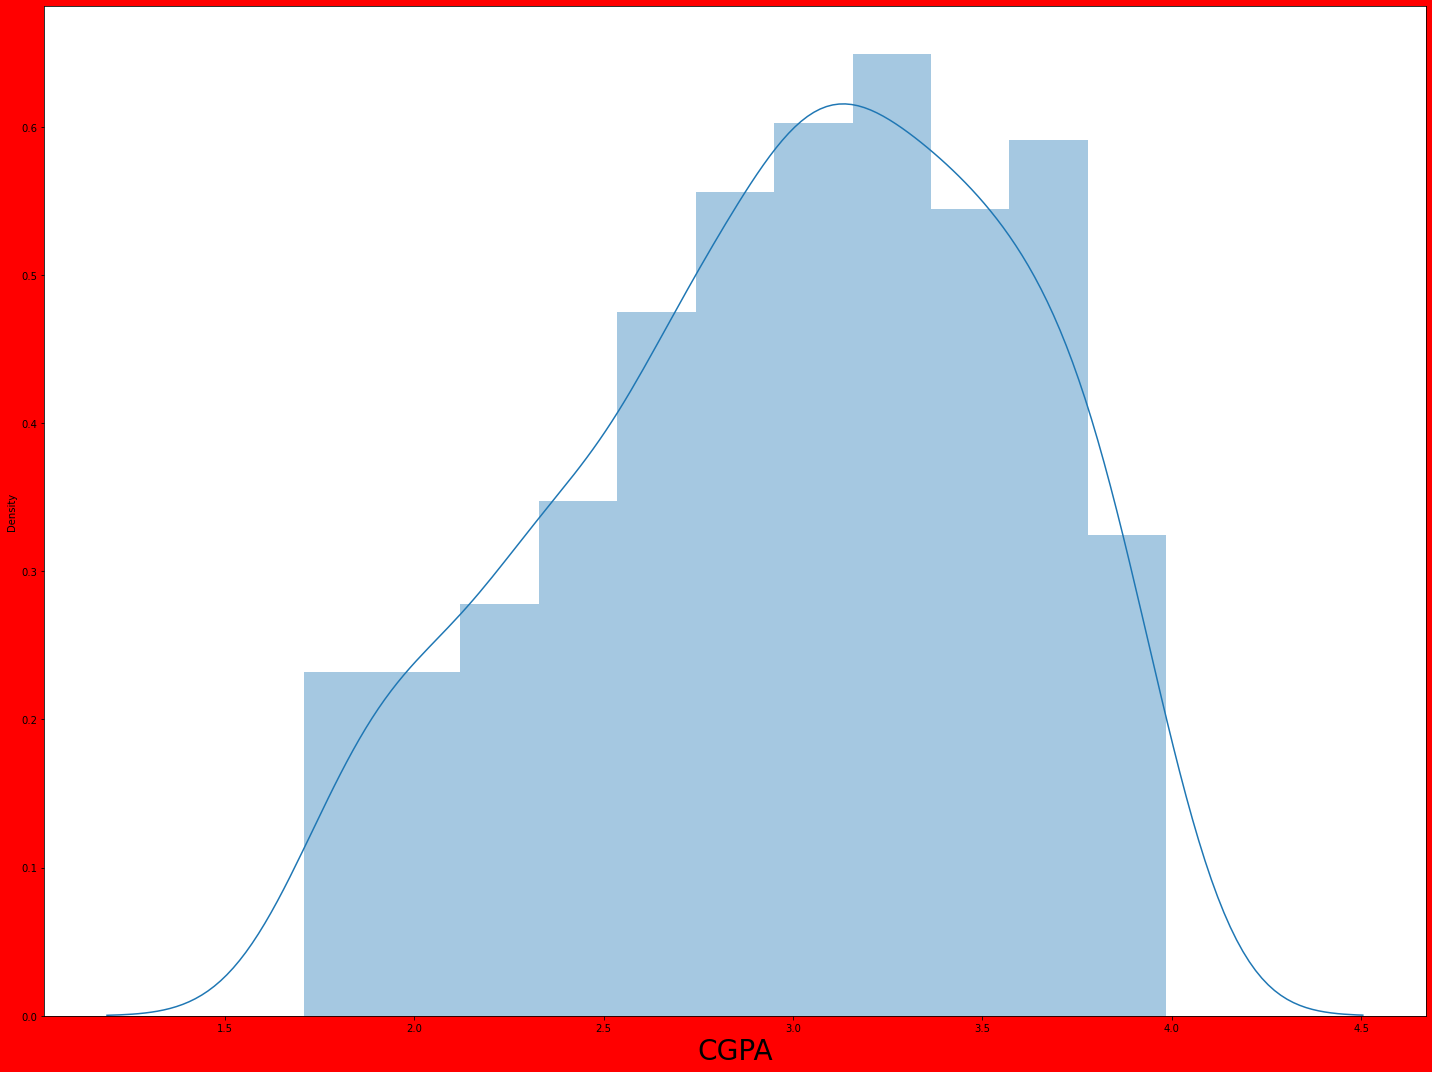

In [15]:
# Plotting distribution plot to check data distribution.

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,15),facecolor='red')
plotnumber = 1

for col in cont_columns:
    if plotnumber <= 1:
        ax = plt.subplot(1,1,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 28)
        
    plotnumber +=1
plt.tight_layout() # plt.show() can be used

In [16]:
len(cat_columns)

43

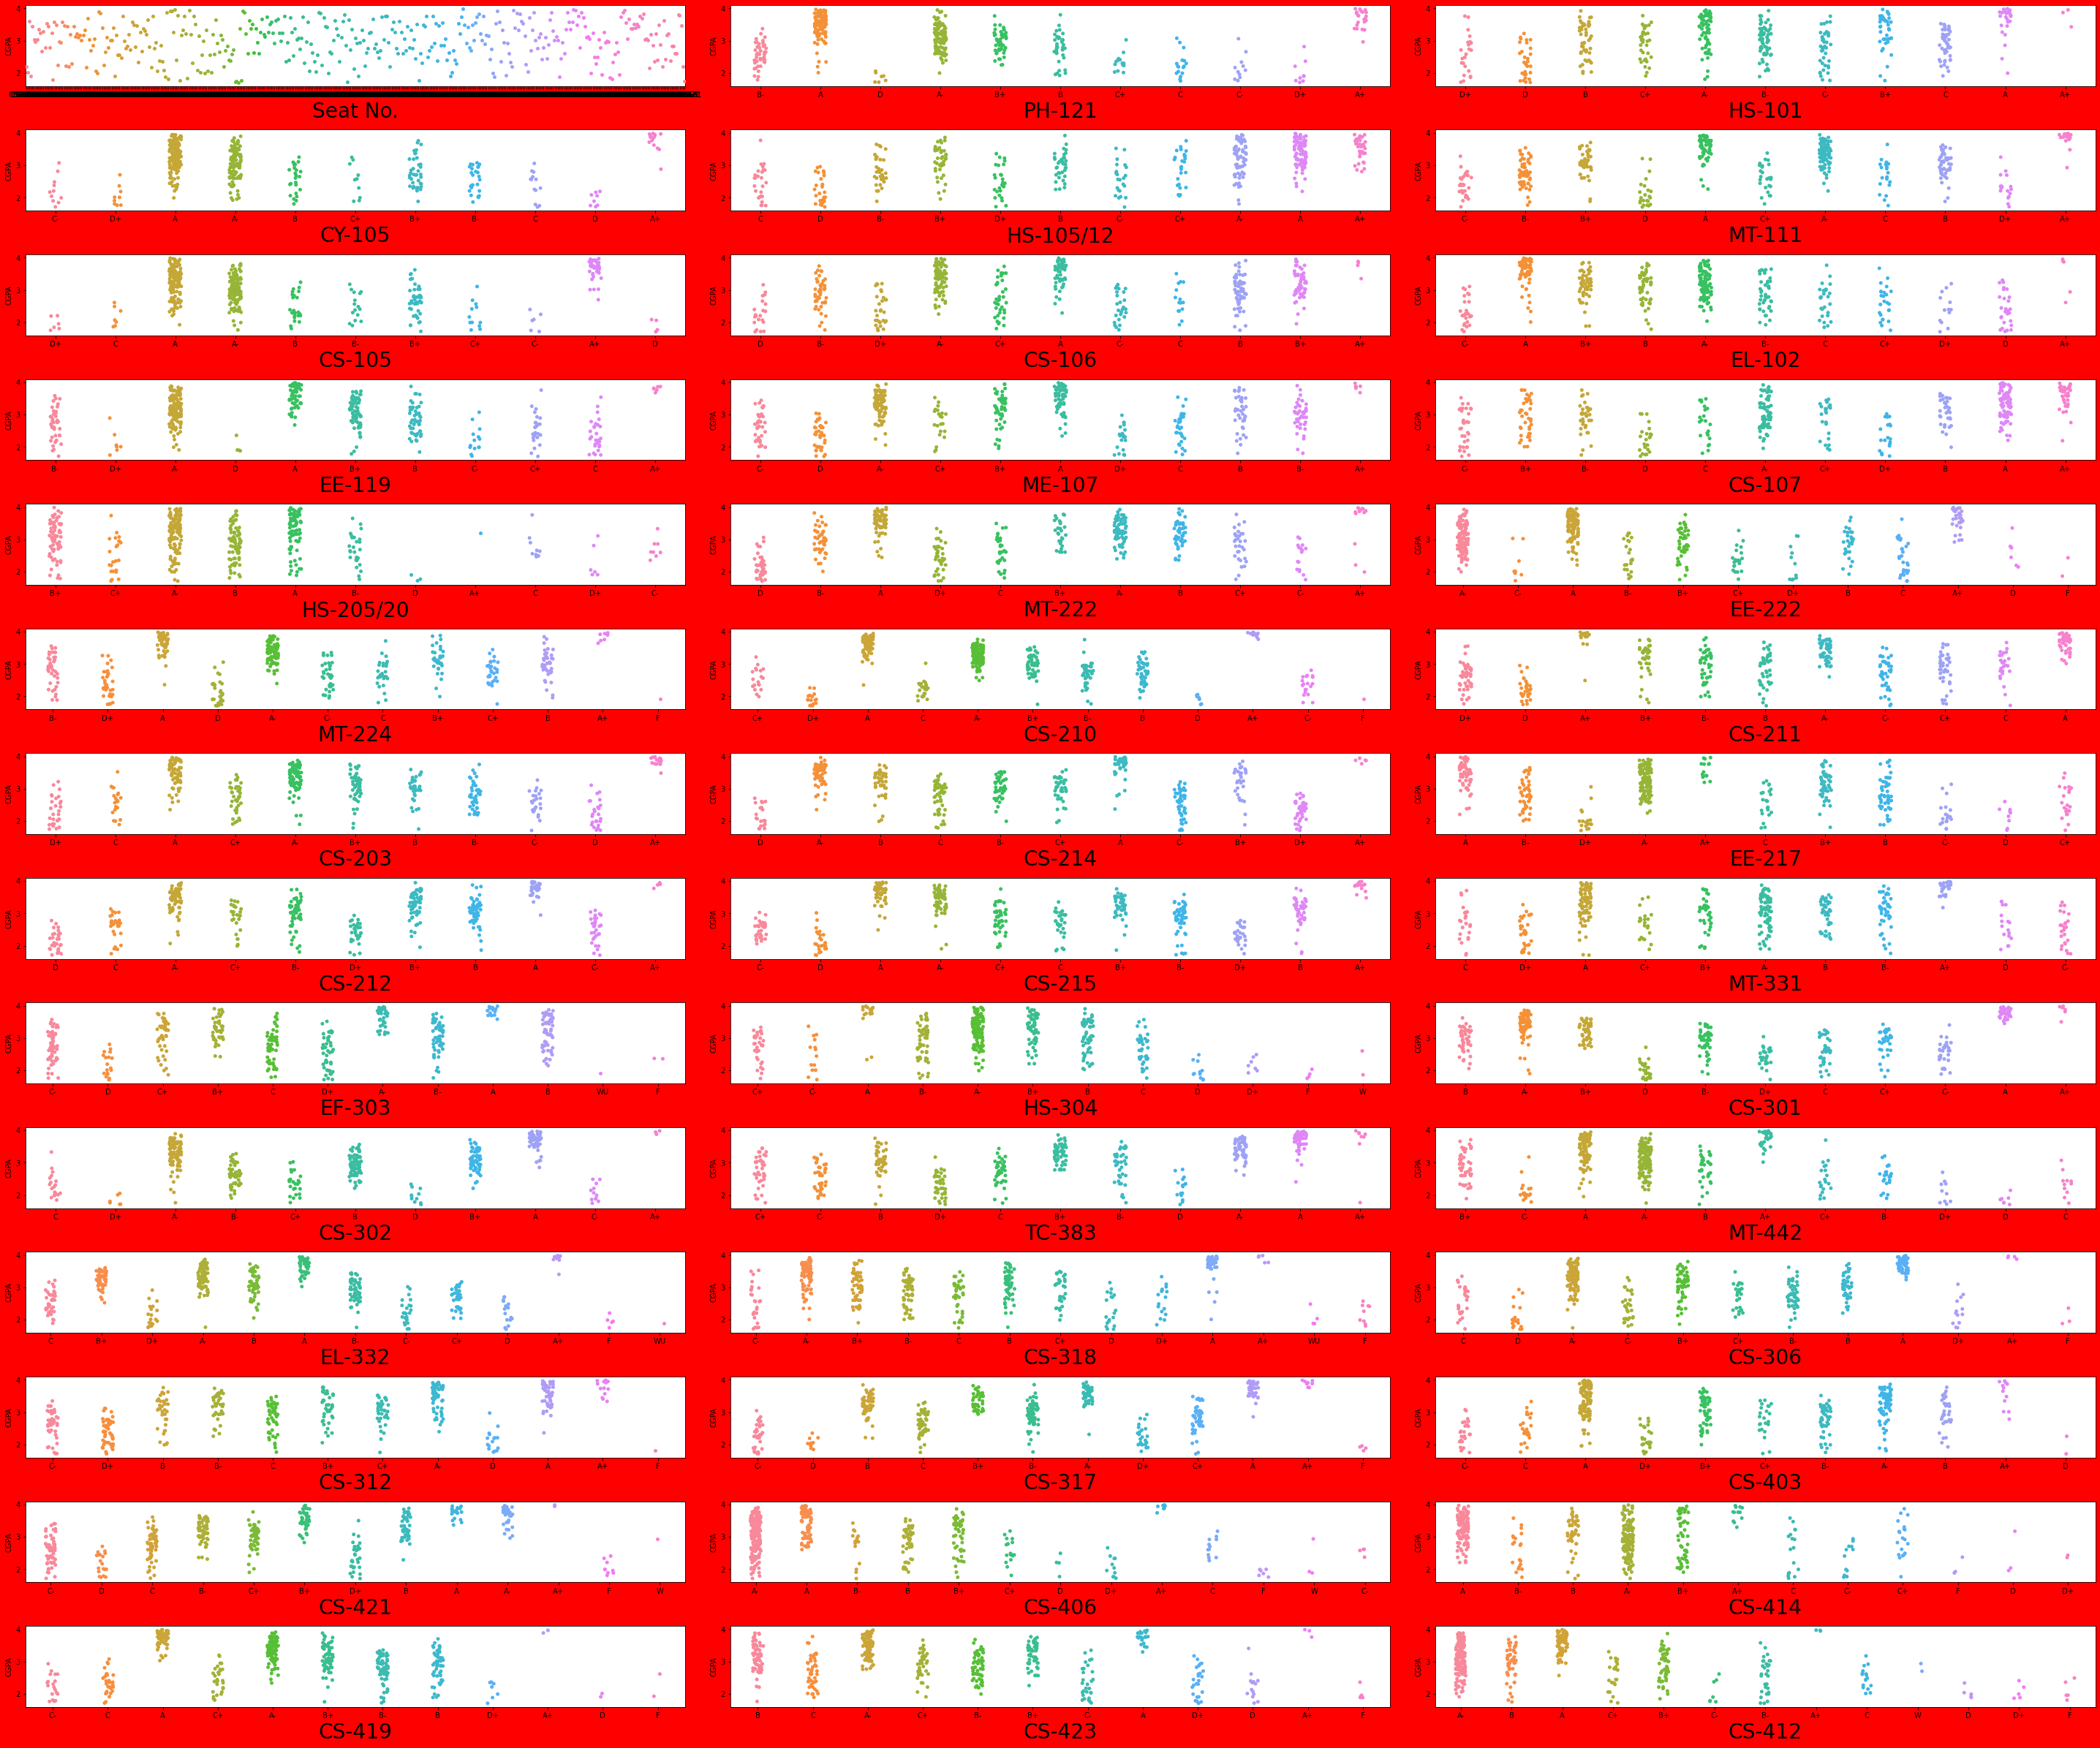

In [17]:
# Relation between categorical features and leabel:                                                 '

plt.figure(figsize=(40,35),facecolor='red')
plotnumber = 1

for col in cat_columns:
    if plotnumber <= 42:
        ax = plt.subplot(15,3,plotnumber)
        sns.stripplot(x=col,y=df.CGPA,data=df)
        plt.xlabel(col,fontsize = 28)
        
    plotnumber +=1
plt.tight_layout()

In [18]:
# Checking skewness
df.skew().sort_values(ascending=False)

CGPA   -0.326574
dtype: float64

In [19]:
y = df['CGPA']
X_old = df.drop(columns = ['CGPA'])

In [20]:
X = pd.get_dummies(X_old)

In [21]:
X_old.shape

(417, 43)

In [22]:
X.shape

(417, 891)

In [23]:
y.shape

(417,)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [25]:
# Splitting our data to training data and testing data
# x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test = train_test_split(X_standard,y,test_size=0.20,random_state=1)

# Here we are keeping training data as our scalled data and testing data as our label or target.

In [26]:
# MOdel instantiating and training

from sklearn.linear_model import LinearRegression

# Importing metrics
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

rm = LinearRegression()
rm.fit(x_train,y_train) 
# here we will pass training data

# Testing our model with Adjusted R2 Square: 

# on training data

rm.score(x_train,y_train)

1.0

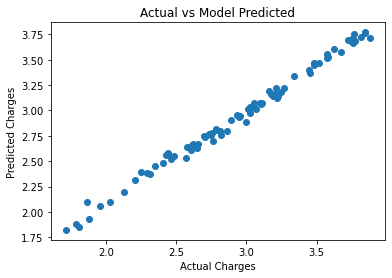

In [27]:
# PLotting and visualizing

y_pred = rm.predict(x_test)

# y_pred

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Model Predicted')
plt.show()

In [28]:
# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

#model performance

print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R2: ", metrics.r2_score(y_test, y_pred), "\n")
print("Score: ", rm.score(x_test, y_test))

MAE:  0.05620541754343548
MSE:  0.004855634592842495
RMSE:  0.06968238366217458
R2:  0.9848018678770729 

Score:  0.9848018678770729


In [29]:
print(rm.coef_)
print(f"{rm.intercept_:.2f}")

[-1.32125750e-03 -1.53835464e-03  4.26066354e-03 -6.80769226e-04
  7.64759884e-04 -1.36479959e-03  2.25065187e-03  1.59071190e-03
  3.75199086e-03  1.36471793e-03  6.97236057e-04  7.67348124e-04
  4.02062848e-03  2.27896032e-03  3.34740343e-04  2.17576293e-03
  1.50867152e-03  1.37226328e-03  1.59089994e-03  2.00846179e-03
 -2.03256772e-03  1.49180672e-03  6.34096257e-04  3.58715262e-03
  1.73741009e-03 -1.32907194e-03  2.55085684e-03  1.72239478e-04
  2.14559312e-03  1.26552760e-03  2.38469470e-03  5.67073074e-04
  1.61809566e-03  1.71281981e-03  2.58689445e-03  2.90248273e-03
  4.12377622e-03  3.77148329e-03 -3.61638589e-03  4.20996579e-03
  1.25409407e-03  1.25261515e-03  2.58351803e-03  2.73706776e-03
 -1.40239432e-03  5.11685162e-04  2.81907825e-03  1.35188843e-03
  2.38325367e-03  6.07647328e-04  9.81130703e-04  1.37307651e-03
  2.13812268e-03  8.85003555e-04  1.28117227e-03  2.36775171e-03
 -1.94376455e-03  3.99779197e-03  1.11555322e-03  1.39130000e-04
 -9.45781739e-04  2.33609

In [30]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

lassocv = LassoCV(alphas = None , max_iter = 100, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [31]:
# Best alpha parameter
alpha = lassocv.alpha_ # Best alpha rate
alpha

1.6640280944304797e-05

In [32]:
# Now since we have the best parameter, lasso regression will be used:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
# i.e. when model is training it will learn at this speed 6....

Lasso(alpha=1.6640280944304797e-05)

In [33]:
lasso_reg.score(x_test,y_test)

0.5922560336901775

In [34]:
# Ridge Method:

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [35]:
ridgecv.alpha_ # Best alpha rate

0.001

In [36]:
ridgecv.score(x_test,y_test)

0.9934250206728078

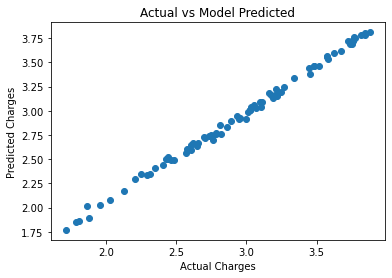

In [37]:
# PLotting and visualizing

y_predrv = ridgecv.predict(x_test)

# y_pred

plt.scatter(y_test,y_predrv)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Model Predicted')
plt.show()

In [38]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", metrics.mean_squared_error(y_test, y_pred, squared=False))
print("R2: ", metrics.r2_score(y_test, y_pred), "\n")
print("Score: ", ridgecv.score(x_test, y_test))

MAE:  0.05620541754343548
MSE:  0.004855634592842495
RMSE:  0.06968238366217458
R2:  0.9848018678770729 

Score:  0.9934250206728078


In [39]:
# Using decision tree:

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(x_train, y_train)

y_preddt = model.predict(x_test)

r2_score(y_test,y_preddt)


0.680327896155305

In [40]:
# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MAE: ", metrics.mean_absolute_error(y_test, y_preddt))
print("MSE: ", metrics.mean_squared_error(y_test, y_preddt))
print("RMSE: ", metrics.mean_squared_error(y_test, y_preddt, squared=False))
print("R2: ", metrics.r2_score(y_test, y_preddt), "\n")
print("Score: ", model.score(x_test, y_preddt))

MAE:  0.20919047619047615
MSE:  0.10213169047619049
RMSE:  0.31958049138861794
R2:  0.680327896155305 

Score:  1.0


In [41]:
# Random forest:

from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100)

regressor_rf.fit(x_train, y_train)

lr_normal_rf = regressor_rf.score(x_train, y_train)

lr_normal_rf

0.9864921374277386

In [42]:
y_predrf = regressor_rf.predict(x_test)

lr_normal_rf_test = regressor_rf.score(x_test, y_test)

lr_normal_rf_test

mse_lr_normal_rf  = mean_absolute_error(y_test, y_predrf)

mse_lr_normal_rf

0.1269560714285715

In [43]:
# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MAE: ", metrics.mean_absolute_error(y_test, y_predrf))
print("MSE: ", metrics.mean_squared_error(y_test, y_predrf))
print("RMSE: ", metrics.mean_squared_error(y_test, y_predrf, squared=False))
print("R2: ", metrics.r2_score(y_test, y_predrf), "\n")
print("Score: ", regressor_rf.score(x_test, y_predrf))

MAE:  0.1269560714285715
MSE:  0.029532715558333335
RMSE:  0.17185085265524094
R2:  0.907562625559593 

Score:  1.0


In [44]:
# Using Support vector regressor:

# Fit the model over the training data
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

y_predsvr = svr.predict(x_test)

r2_score(y_test,y_predsvr)

0.8270391070805485

In [45]:
import xgboost as xgb

# Using XGBoost:

xgb_clf = xgb.XGBRegressor()
xgb_clf.fit(x_train,y_train)

y_predx = xgb_clf.predict(x_test)

r2_score(y_test,y_predx)

0.9341726585935641

In [46]:
# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MAE: ", metrics.mean_absolute_error(y_test, y_predx))
print("MSE: ", metrics.mean_squared_error(y_test, y_predx))
print("RMSE: ", metrics.mean_squared_error(y_test, y_predx, squared=False))
print("R2: ", metrics.r2_score(y_test, y_predx), "\n")
print("Score: ", xgb_clf.score(x_test, y_predx))

MAE:  0.10018445358957562
MSE:  0.021031105237318007
RMSE:  0.14502105101438897
R2:  0.9341726585935641 

Score:  1.0


In [47]:
# Innitiate k neighbour Regressor:

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(x_train,y_train)

y_predknn = knn.predict(x_test)

r2_score(y_test,y_predknn)

0.27247901097030736

In [48]:
# Model Evaluation: MAE , MSE , RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MAE: ", metrics.mean_absolute_error(y_test, y_predknn))
print("MSE: ", metrics.mean_squared_error(y_test, y_predknn))
print("RMSE: ", metrics.mean_squared_error(y_test, y_predknn, squared=False))
print("R2: ", metrics.r2_score(y_test, y_predknn), "\n")
print("Score: ", xgb_clf.score(x_test, y_predknn))

MAE:  0.3581928571428572
MSE:  0.23243488428571432
RMSE:  0.48211501147103303
R2:  0.27247901097030736 

Score:  -1.1991539868399457
